Notebook for running NN function

In [124]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [125]:
data = pd.read_csv('./digit-recognizer/train.csv')

In [126]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
#convert data to numpy array
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


In [140]:
Y_train.shape

(41000,)

In [129]:
#create function to initalize NN weights and biases
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2



In [130]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2


In [133]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1000)

Iteration:  0
[4 0 8 ... 2 4 4] [9 6 7 ... 7 7 3]
0.07453658536585366
Iteration:  10
[4 0 0 ... 2 4 3] [9 6 7 ... 7 7 3]
0.1524390243902439
Iteration:  20
[4 0 8 ... 2 4 7] [9 6 7 ... 7 7 3]
0.24168292682926829
Iteration:  30
[7 0 7 ... 7 4 7] [9 6 7 ... 7 7 3]
0.3156341463414634
Iteration:  40
[7 0 7 ... 7 7 7] [9 6 7 ... 7 7 3]
0.36078048780487804
Iteration:  50
[7 0 7 ... 7 7 7] [9 6 7 ... 7 7 3]
0.4074390243902439
Iteration:  60
[7 0 7 ... 7 7 7] [9 6 7 ... 7 7 3]
0.45470731707317075
Iteration:  70
[7 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.49873170731707317
Iteration:  80
[9 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.5400243902439025
Iteration:  90
[9 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.5738048780487804
Iteration:  100
[9 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.6026829268292683
Iteration:  110
[9 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.6260975609756098
Iteration:  120
[9 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.6466829268292683
Iteration:  130
[9 6 7 ... 7 7 3] [9 6 7 ... 7 7 3]
0.6642439024390244
Iteration:  

In [156]:
#make predictions using trained weights and biases
def make_prediction(X, W1, b1, W2, b2):
    _,_,_, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_prediction(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()


Prediction:  [9]
Label:  9


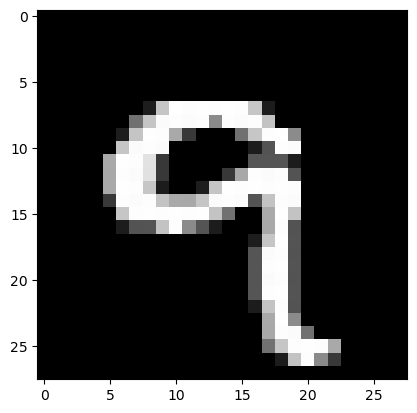

In [157]:
test_prediction(0, W1, b1, W2, b2)

In [158]:
dev_predictions = make_prediction(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[6 3 3 4 2 6 9 9 9 7 9 1 6 4 3 1 5 3 9 3 3 0 5 6 6 7 3 0 1 3 1 9 0 2 7 6 7
 7 6 5 7 6 9 4 5 3 4 2 4 8 8 5 3 6 9 1 4 8 5 0 1 3 0 8 9 3 9 2 5 6 3 0 0 2
 0 4 4 7 2 8 0 0 3 6 6 6 1 8 3 6 8 8 0 1 2 4 8 8 7 4 7 8 2 8 3 3 6 0 0 1 6
 1 1 3 4 8 6 6 1 4 0 1 6 1 3 2 9 7 2 1 4 5 2 2 5 6 4 3 6 6 1 0 5 1 0 5 0 1
 9 4 3 4 1 8 8 3 0 5 2 9 2 3 1 7 9 5 6 2 7 9 2 4 1 0 9 5 7 3 8 6 1 4 6 1 5
 1 6 2 9 4 7 9 6 8 3 8 6 3 0 5 0 6 3 2 6 8 9 2 2 5 1 7 1 7 6 2 2 6 9 6 3 7
 9 7 8 8 7 0 7 7 7 5 5 7 9 5 7 4 7 3 3 9 4 3 0 7 3 1 5 0 9 1 7 1 4 2 4 6 0
 3 7 1 2 6 1 5 0 8 3 0 5 4 7 8 0 2 6 2 7 7 3 4 1 7 6 3 1 2 8 4 8 9 6 8 3 4
 7 2 6 9 8 6 9 9 2 7 2 7 1 3 8 7 5 8 0 2 2 5 4 6 0 1 6 5 2 6 9 9 3 7 1 1 0
 6 9 6 8 7 9 9 6 7 1 9 0 0 0 5 0 1 6 7 6 4 9 2 1 6 0 1 7 0 0 9 3 4 5 5 5 6
 9 7 4 4 3 0 2 2 2 4 3 9 0 7 9 4 0 7 1 0 3 2 8 1 5 8 8 0 6 0 1 3 5 7 3 4 3
 9 6 4 4 4 8 9 7 0 9 6 4 9 9 8 4 4 6 7 1 3 1 6 4 7 9 7 4 9 2 4 0 0 8 2 6 4
 4 8 7 1 1 7 2 8 0 7 1 2 2 4 6 9 7 6 3 0 5 0 7 1 6 1 2 6 0 6 3 8 5 1 1 3 2
 2 3 1 6 1 5 0 6 7 1 0 8 

0.881